# Area plot

### Definition:
Ein Area Plot ist ein Diagramm, das Daten als Linien darstellt und den Bereich unter der Linie ausfüllt. Das hilft dabei, Trends und Veränderungen in den Daten zu sehen

### Anwendungen:
- Das hilft dabei, Trends und Veränderungen in den Daten zu sehen. 
- Man kann sie nutzen, um zu zeigen, wie sich Dinge im Laufe der Zeit ändern oder um verschiedene Kategorien miteinander zu vergleichen.
- Sie sind nützlich, um auf einen Blick zu sehen, wie sich Daten entwickeln.

In [1]:
import pandas as pd

In [26]:
df_can = pd.read_excel(
    'Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),  #20 Zeilen überspringen
    skipfooter=2)

In [27]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.rename(columns={'OdName':'country'},inplace=True)

In [5]:
total = df_can.loc[:,1980:2013].sum(axis=1)

In [6]:
df_can['Total']=total

In [7]:
df_can.drop(['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],axis=1,inplace=True)

In [8]:
df_can.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15


In [9]:
df_can.set_index('country', inplace=True)

In [10]:
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [11]:
df_sorted = df_can.sort_values(by='Total', ascending =False)

In [12]:
df_top4=df_sorted.head(4)
df_top4=df_top4.transpose()

In [13]:
df_top4.head()

country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines
1980,8880,5123,22045,6051
1981,8670,6682,24796,5921
1982,8147,3308,20620,5249
1983,7338,1863,10015,4562
1984,5704,1527,10170,3801


In [14]:
df_top4.drop('Total',axis=0,inplace=True)

In [15]:
df_top4 = df_top4.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK and North Ireland'})

In [16]:
df_top4.tail()

country,India,China,UK and North Ireland,Philippines
2009,29456,29622,8876,28573
2010,34235,30391,8724,38617
2011,27509,28502,6204,36765
2012,30933,33024,6195,34315
2013,33087,34129,5827,29544


### Area plot

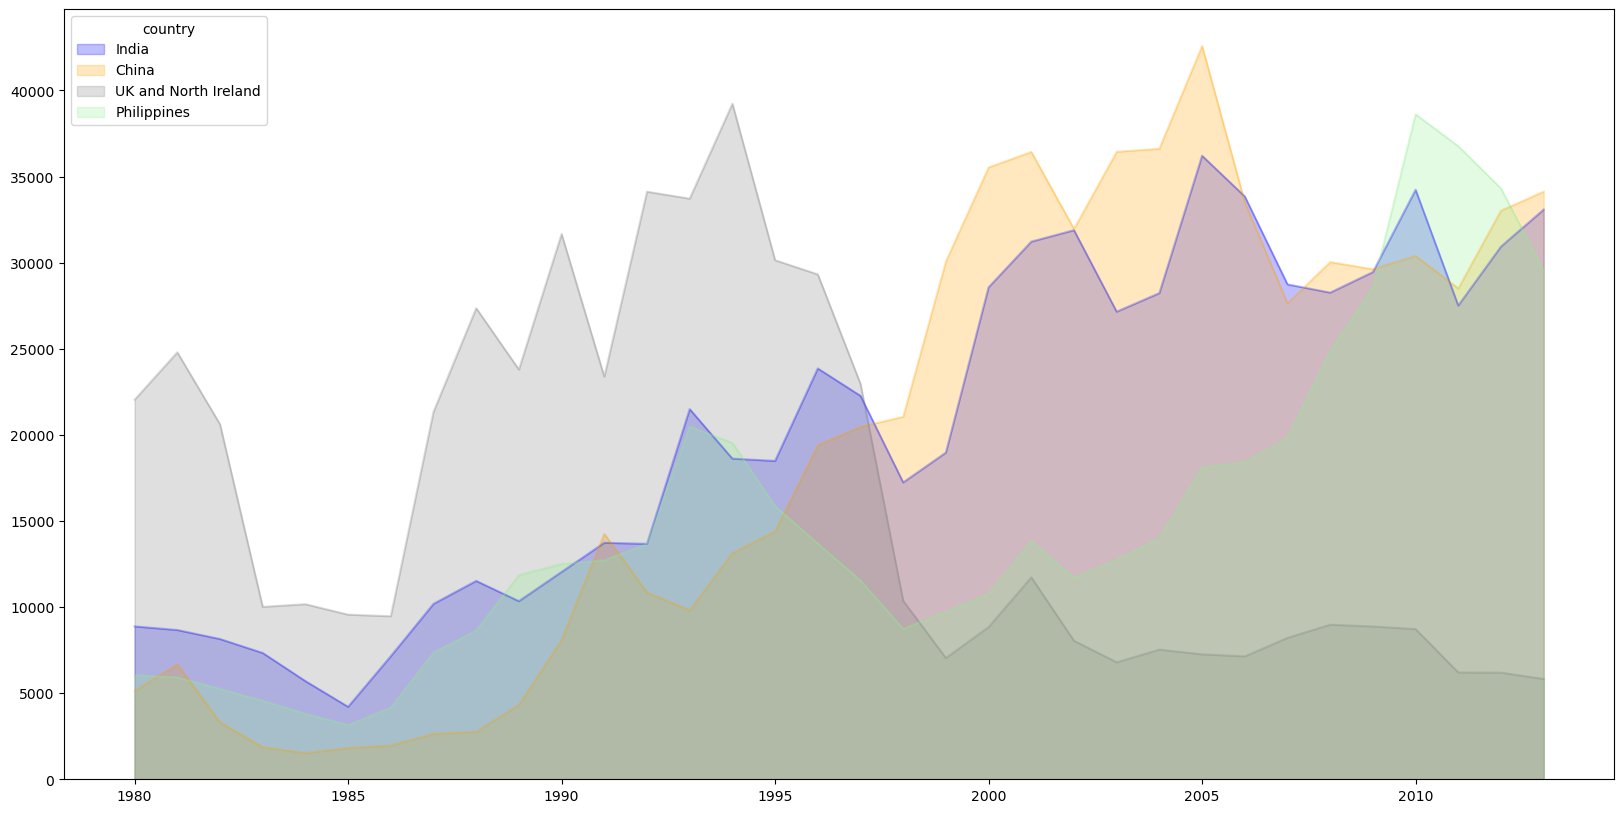

In [18]:
area = df_top4.plot(kind='area', stacked=False,alpha=0.25, figsize=(20, 10), color=['blue', 'orange', 'grey', 'lightgreen'])


In [ ]:
import pandas as pd
import plotly.express as px

# Leere DataFrame erstellen
years = df_top4.index


# Interaktives Bereichsdiagramm erstellen
fig = px.area(df_top4, x=years, y=df_top4.columns, title='Einwanderung nach Kanada')
fig.update_xaxes(dtick=5)  # Festlegen der x-Achsen-Tick-Intervalle
fig.update_layout(width=1200, height=600)  # Passen Sie die Breite und Höhe nach Bedarf an
fig.show()
